input the generation of fibonacci: 13


The pattern is as follows: ABAABABAABAABABAABABAABAABABAABAABABAABABAABAABABAABABAABAABABAABAABABAABABAABAABABAABAABABAABABAABAABABAABABAABAABABAABAABABAABABAABAABABAABABAABAABABAABAABABAABABAABAABABAABAABABAABABAABAABABAABABAABAABABAABAABABAABABAABAABABAABAAB


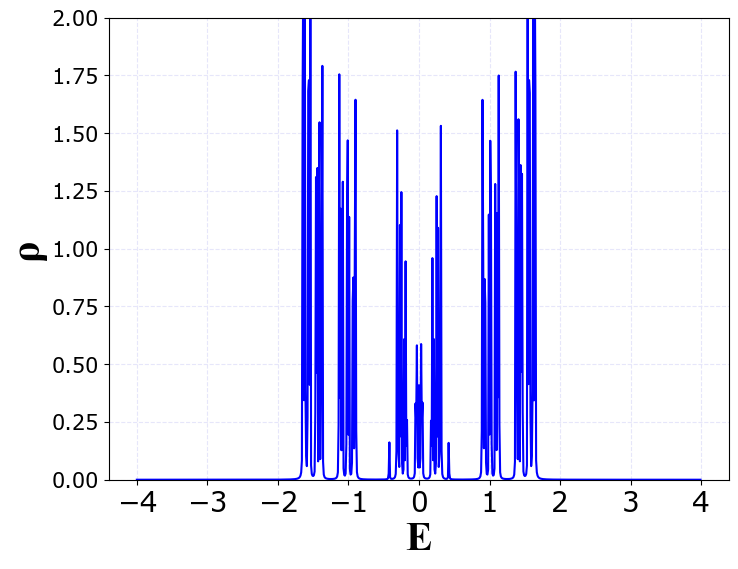

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_fibonacci_pattern(n):
    if n == 1:
        return 'B'
    elif n == 2:
        return 'A'
    else:
        return generate_fibonacci_pattern(n-1) + generate_fibonacci_pattern(n-2)

# Generate the Fibonacci pattern and store it as a string
k= int(input("input the generation of fibonacci:"))
fibonacci_pattern = generate_fibonacci_pattern(k)

print("The pattern is as follows:", fibonacci_pattern)

x= fibonacci_pattern
c = len(x)
eim = 0.001
eps= 0.00001
est = -4.0
emax = 4.0
eint = 0.01
list1=[]
N_site= 1*c+1

H = np.eye(N_site, dtype= complex)*eps
#t=1

for i, pattern in enumerate(x):
    if pattern == 'A':
        
        t=1
        
    elif pattern == 'B':
        
        t=0.5
    
    j = i  # We use i as the base index since we're iterating over x
    

    # Check if the indices are within bounds before modifying the matrix
    #if 3*j+3 < H.shape[0]:
    H[1*j, 1*j+1] = t
    H[1*j+1, 1*j] = t
    

# For complex matrices
complex_matrix = np.array(H)

def print_complex_matrix(matrix):
    for row in matrix:
        print(" ".join(f"{elem.real:.2f}+{elem.imag:.2f}j" for elem in row))

#print_complex_matrix(complex_matrix)

for eng in np.arange(est, emax, eint):
    e = eng + 1j * eim
    emat = np.eye(N_site) * e
    effmat = emat - H
    greenmat = np.linalg.inv(effmat)
    trmat = np.trace(greenmat)
    multi = N_site
    dos = (-1 / (multi*np.pi)) * np.imag(trmat)

    list1.append([eng, dos])

# Plotting
eng_values = [pair[0] for pair in list1]
dos_values = [pair[1] for pair in list1]

plt.figure(figsize=(8, 6))
plt.plot(eng_values, dos_values, color='blue', linewidth=1.5)
plt.xlabel('E', fontsize=29, fontname='Times New Roman', fontweight='bold')
plt.ylabel('ρ', fontsize=29, fontname='Times New Roman', fontweight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.grid(True, linestyle='--', color='lavender')
#plt.xlim(min(eng_values), max(eng_values))
#plt.xlim(-1.5,1.5)
plt.ylim(0,2)
#
plt.show()

input the generation of fibonacci: 11


The pattern is as follows: ABAABABAABAABABAABABAABAABABAABAABABAABABAABAABABAABABAABAABABAABAABABAABABAABAABABAABAAB


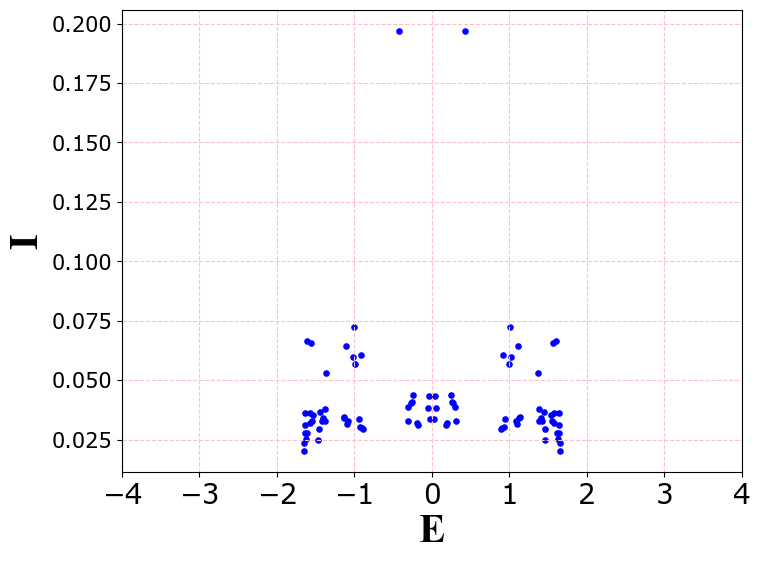

In [3]:

import numpy as np
import matplotlib.pyplot as plt

def generate_fibonacci_pattern(n):
    if n == 1:
        return 'B'
    elif n == 2:
        return 'A'
    else:
        return generate_fibonacci_pattern(n-1) + generate_fibonacci_pattern(n-2)

# Generate the Fibonacci pattern and store it as a string
k= int(input("input the generation of fibonacci:"))
fibonacci_pattern = generate_fibonacci_pattern(k)

print("The pattern is as follows:", fibonacci_pattern)

x= fibonacci_pattern
c = len(x)
eim = 0.001
eps= 0.00001
est = -4.0
emax = 4.0
eint = 0.01
list1=[]
N_site= 1*c+1

H = np.eye(N_site, dtype= complex)*eps
#t=1

for i, pattern in enumerate(x):
    if pattern == 'A':
        
        t=1
        
    elif pattern == 'B':
        
        t=0.5
    
    j = i  # We use i as the base index since we're iterating over x
    

    # Check if the indices are within bounds before modifying the matrix
    #if 3*j+3 < H.shape[0]:
    H[1*j, 1*j+1] = t
    H[1*j+1, 1*j] = t






eigenvalues, eigenvectors = np.linalg.eigh(H)


energy_I_list = []

# Calculate I for each wave function (eigenvector)
for idx in range(len(eigenvalues)):
    wave_function = eigenvectors[:, idx]
    #wave_function_squared = (wave_function)**2
    sum_psi_squared = np.sum(np.abs(wave_function) ** 2)  
    sum_psi_fourth = np.sum(np.abs(wave_function) ** 4)   

    I = sum_psi_fourth / (sum_psi_squared ** 2)
    energy_I_list.append([eigenvalues[idx], I])


energy_values = [pair[0] for pair in energy_I_list]
I_values = [pair[1] for pair in energy_I_list]


plt.figure(figsize=(8, 6))
plt.grid(True, linestyle='--', color='pink')
plt.scatter(energy_values, I_values, color='blue', s=14)
plt.xlabel('E', fontsize=29, fontname='Times New Roman', fontweight='bold')
plt.ylabel('I', fontsize=29, fontname='Times New Roman', fontweight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

#plt.ylim(0,.25)
plt.xlim(-4,4)
plt.show()